In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
airlines_df = pd.read_excel('F:\\PYTHON\\DATA SCIENCE\\CLUSTERING\\Assignments\\EastWestAirlines.xlsx',sheet_name='data')

In [3]:
airlines_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlines_df.shape

(3999, 12)

In [5]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airlines_cleaned = airlines_df.drop('ID#',axis = 1)

In [7]:
airlines_cleaned
# Cleaned data after removing ID[not required] 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
airlines_cleaned[airlines_cleaned.duplicated()]
#checking for duplicates

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
airlines_cleaned = airlines_cleaned.drop_duplicates().reset_index()
# Removing Duplicates 

In [10]:
airlines_cleaned.drop('index', axis = 1,inplace = True)

In [11]:
airlines_cleaned

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
airlines_cleaned.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


<AxesSubplot:xlabel='Balance', ylabel='Count'>

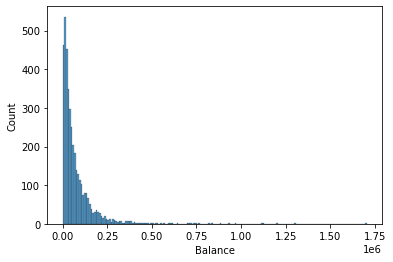

In [13]:
sns.histplot(airlines_cleaned['Balance'])
# Data is positively skewed
# It has spread of customers with 0 to 1.7M miles balance for award flight
# Majority of customers falls under range of 0 to 25k miles available balance.

In [14]:
airlines_cleaned[airlines_cleaned['Balance'] == 0]
#Deleting item to apply log for trasforming data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
2996,0,0,1,1,1,5491,18,2116,5,3204,1


In [15]:
airlines_cleaned = airlines_cleaned.drop( airlines_cleaned.index[2996] ,axis = 0 ).reset_index()

In [16]:
airlines_cleaned.drop(labels='index',axis =1,inplace = True)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

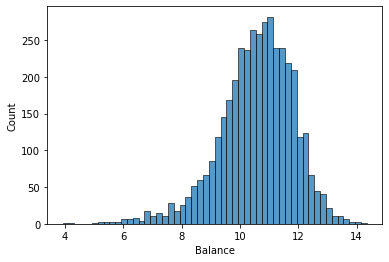

In [17]:
sns.histplot(np.log(airlines_cleaned['Balance']))
# Tranformed data using log function 

In [18]:
airlines_cleaned['Balance'] = np.log(airlines_cleaned['Balance'])

In [19]:
airlines_cleaned[airlines_cleaned['Qual_miles'] ==0]
# Only 228 customers are having qualifying miles for top flights status.

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,10.245054,0,1,1,1,174,1,0,0,7000,0
1,9.864955,0,1,1,1,215,2,0,0,6968,0
2,10.629924,0,1,1,1,4123,4,0,0,7034,0
3,9.600760,0,1,1,1,500,1,0,0,6952,0
4,11.490189,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3992,9.824228,0,1,1,1,8525,4,200,1,1403,1
3993,11.072636,0,1,1,1,981,5,0,0,1395,1
3994,11.206360,0,3,1,1,25447,8,0,0,1402,1
3995,10.913250,0,1,1,1,500,1,500,1,1401,0


In [20]:
airlines_cleaned.rename({'Award?': 'Award'} , axis = 1,inplace = True)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scalar = StandardScaler()
X = scalar.fit_transform(airlines_cleaned)
# Standardizing the values

In [23]:
X

array([[-0.24559576, -0.18634691, -0.76988501, ..., -0.36197604,
         1.39498358, -0.76681262],
       [-0.54630596, -0.18634691, -0.76988501, ..., -0.36197604,
         1.37948689, -0.76681262],
       [ 0.05888909, -0.18634691, -0.76988501, ..., -0.36197604,
         1.41144881, -0.76681262],
       ...,
       [ 0.51492757, -0.18634691,  0.6826665 , ..., -0.36197604,
        -1.31596892,  1.30409957],
       [ 0.28303843, -0.18634691, -0.76988501, ..., -0.09834298,
        -1.31645319, -0.76681262],
       [-2.01249261, -0.18634691, -0.76988501, ..., -0.36197604,
        -1.317906  , -0.76681262]])

# Hierarchical Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

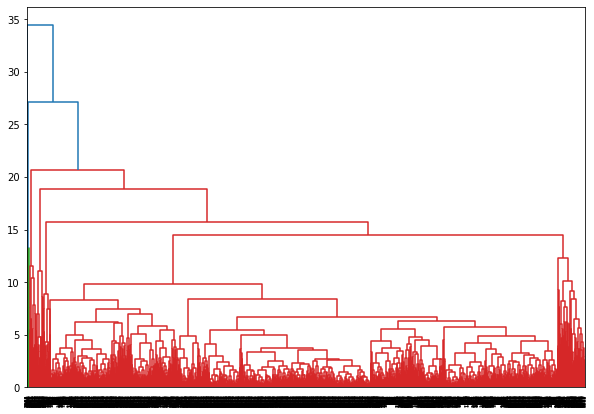

In [25]:
plt.figure(figsize=(10,7))
dendogram = sch.dendrogram(sch.linkage(X ,method = 'complete'))
#It wount be the suitable method of clustering as we have more number of rows.


In [26]:
cluster = AgglomerativeClustering(n_clusters=5 ,linkage = 'complete')
#Cutting down the clusters

In [27]:
predict = cluster.fit_predict(X)

In [28]:
predict_new = pd.DataFrame(predict , columns= ['clusters'])

In [29]:
airlines_cleaned['clusters'] = predict_new

In [30]:
airlines_cleaned

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,10.245054,0,1,1,1,174,1,0,0,7000,0,0
1,9.864955,0,1,1,1,215,2,0,0,6968,0,0
2,10.629924,0,1,1,1,4123,4,0,0,7034,0,0
3,9.600760,0,1,1,1,500,1,0,0,6952,0,0
4,11.490189,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,9.824228,0,1,1,1,8525,4,200,1,1403,1,0
3993,11.072636,0,1,1,1,981,5,0,0,1395,1,0
3994,11.206360,0,3,1,1,25447,8,0,0,1402,1,0
3995,10.913250,0,1,1,1,500,1,500,1,1401,0,0


In [31]:
Grouping = airlines_cleaned.groupby('clusters')

In [32]:
Grouping.get_group(0)
    

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,10.245054,0,1,1,1,174,1,0,0,7000,0,0
1,9.864955,0,1,1,1,215,2,0,0,6968,0,0
2,10.629924,0,1,1,1,4123,4,0,0,7034,0,0
3,9.600760,0,1,1,1,500,1,0,0,6952,0,0
4,11.490189,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,9.824228,0,1,1,1,8525,4,200,1,1403,1,0
3993,11.072636,0,1,1,1,981,5,0,0,1395,1,0
3994,11.206360,0,3,1,1,25447,8,0,0,1402,1,0
3995,10.913250,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
airlines_cleaned.groupby('clusters').agg(['mean']).reindex()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,
0,10.542379,68.415979,2.066495,1.000000,1.000773,16840.989433,11.415206,431.509536,1.293814,4127.359021,0.367526
1,11.414917,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,11.422074,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,11.204584,5587.090909,1.909091,1.000000,1.000000,16556.218182,11.545455,925.400000,2.763636,3681.672727,0.454545
4,10.525883,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clusters', ylabel='Balance'>

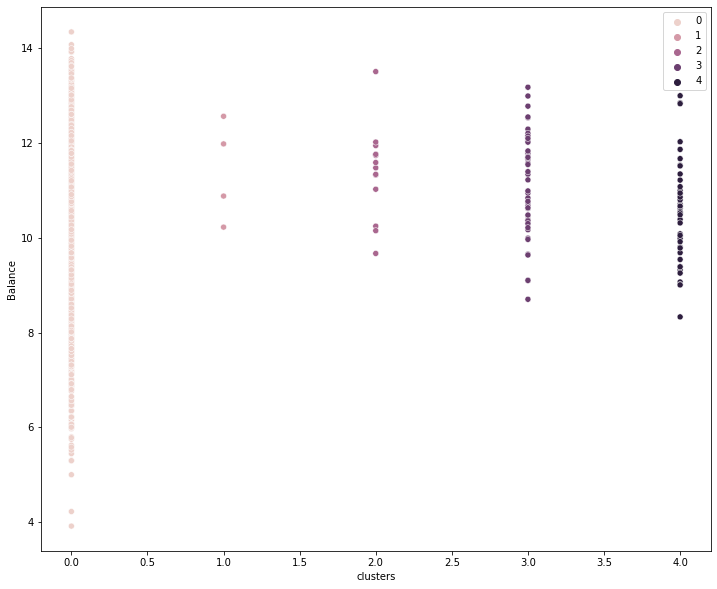

In [34]:
plt.figure(figsize= (12,10))
sns.scatterplot(airlines_cleaned['clusters'] , airlines_cleaned['Balance'] ,data = airlines_cleaned ,hue=cluster.labels_)
#Plotting clusters.

# DBSCAN


In [35]:
from sklearn.cluster import DBSCAN

In [36]:
dbscan = DBSCAN(eps= 1.5 , min_samples= 6)
dbscan.fit(X)
# Creating clusters by passing radius of 1.5 and min samples = 6

DBSCAN(eps=1.5, min_samples=6)

In [37]:
airlines_cleaned['clusters_dbscan'] = dbscan.labels_

In [38]:
Cluster_dbscan = airlines_cleaned.groupby('clusters_dbscan')

In [39]:
Cluster_dbscan.get_group(-1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,clusters_dbscan
8,13.001332,0,3,2,1,1753,43,3850,12,6948,1,4,-1
21,12.131785,2024,1,1,1,13300,16,1800,9,6896,1,0,-1
22,9.932269,0,1,1,1,3450,11,3450,11,6884,0,0,-1
42,11.007303,0,1,1,1,10000,26,3250,9,7829,1,0,-1
45,12.573715,967,1,1,1,23600,14,2000,4,6884,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,9.473012,1000,1,1,1,13890,39,0,0,1572,1,0,-1
3909,10.931713,2273,1,1,1,8104,19,4104,16,1552,0,0,-1
3915,11.781027,0,4,1,1,65510,37,6349,7,1545,0,0,-1
3932,11.246287,0,1,1,1,10577,2,9577,1,1515,0,0,-1


In [40]:

a = Cluster_dbscan.get_group(0)
b = Cluster_dbscan.get_group(1)
c  = Cluster_dbscan.get_group(2)
d = Cluster_dbscan.get_group(3)
# outliers detected after clustering with dbscan 

In [41]:
airlines_cleaned1 = pd.concat([a,b,c,d],axis=0 , ignore_index=True)

In [42]:
airlines_cleaned1
# Data after removing outliers.

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,clusters_dbscan
0,10.245054,0,1,1,1,174,1,0,0,7000,0,0,0
1,9.864955,0,1,1,1,215,2,0,0,6968,0,0,0
2,10.629924,0,1,1,1,4123,4,0,0,7034,0,0,0
3,9.600760,0,1,1,1,500,1,0,0,6952,0,0,0
4,9.706255,0,1,1,1,0,0,0,0,6942,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,10.314636,0,1,3,1,15370,13,0,0,3853,0,4,3
3689,11.080973,0,1,3,1,14971,13,0,0,1989,0,4,3
3690,10.051778,0,1,3,1,10587,13,150,1,1747,0,4,3
3691,10.526749,0,1,3,1,23760,19,0,0,676,0,4,3


In [43]:
airlines_cleaned['clusters_dbscan'].unique()
#4 clusters are formed 
#Since outliers are <30% , this can be considered.

array([ 0,  1, -1,  2,  3], dtype=int32)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clusters_dbscan', ylabel='Balance'>

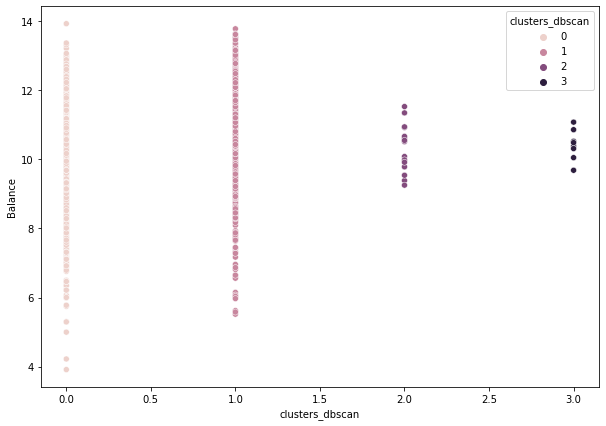

In [44]:
plt.figure(figsize=(10,7))
sns.scatterplot(airlines_cleaned1['clusters_dbscan'] , airlines_cleaned1['Balance'] , data = airlines_cleaned1 , hue =airlines_cleaned1.clusters_dbscan)
#plotting clusters 

# K MEANS


In [45]:
# Creating K means clustering for cleaned data after removing outliers .

airlines_cleaned1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,clusters_dbscan
0,10.245054,0,1,1,1,174,1,0,0,7000,0,0,0
1,9.864955,0,1,1,1,215,2,0,0,6968,0,0,0
2,10.629924,0,1,1,1,4123,4,0,0,7034,0,0,0
3,9.600760,0,1,1,1,500,1,0,0,6952,0,0,0
4,9.706255,0,1,1,1,0,0,0,0,6942,0,0,0


In [46]:
airlines_cleaned1 = airlines_cleaned1.drop(['clusters','clusters_dbscan'] , axis =1 ,)

In [47]:
airlines_cleaned1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,10.245054,0,1,1,1,174,1,0,0,7000,0
1,9.864955,0,1,1,1,215,2,0,0,6968,0
2,10.629924,0,1,1,1,4123,4,0,0,7034,0
3,9.600760,0,1,1,1,500,1,0,0,6952,0
4,9.706255,0,1,1,1,0,0,0,0,6942,0


In [48]:
from sklearn.preprocessing import StandardScaler
scalar_k = StandardScaler()
scaled_df = scalar_k.fit_transform(airlines_cleaned1)
# Standardizing the data

In [49]:
from sklearn.cluster import KMeans

In [50]:
# Creating 4 clusters 

In [51]:
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [52]:
# checking with elbow menthod for num of clusters to be formed 

In [53]:
wcss = [] 
for i in range(1,8):
    kmeans_cluster = KMeans(n_clusters=i , random_state= 0 )
    kmeans_cluster.fit(scaled_df)
    wcss.append(kmeans_cluster.inertia_)

In [54]:
inertia = pd.DataFrame({'number of clusters': range(1,8),'Inertia' : wcss})

In [55]:
inertia
# Inertia of different clusters formed 

,number of clusters,Inertia
0,1,36930.000000
1,2,28756.562330
2,3,24234.693172
3,4,22322.458454
4,5,19072.293877
5,6,16245.850065
6,7,14435.307377


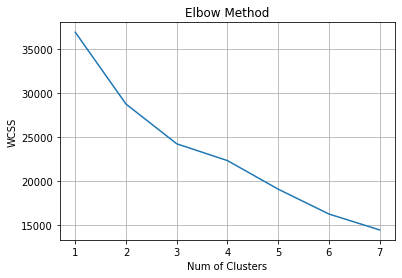

In [56]:
plt.plot(range(1,8) , wcss)
plt.xlabel("Num of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid()
# from graph noted that clusters 2,3 will be the good option 

In [57]:
# Creating 3 clusters 
kmeans_cluster_1 = KMeans(n_clusters= 3 , random_state= 0 )
kmeans_cluster_1.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [58]:
airlines_cleaned1["Kmean_cluster"] = kmeans_cluster_1.labels_

In [59]:
airlines_cleaned1.groupby('Kmean_cluster').agg(['mean']).reset_index()

,Kmean_cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,9.992627,35.670637,1.131929,1.014201,1,3666.666514,6.025195,87.982135,0.310124,3650.349977,0.184608
1,1,11.240051,23.133543,3.591516,1.000000,1,34922.717203,17.798900,163.791045,0.520031,4770.152396,0.562451
2,2,11.053507,52.227848,1.666667,1.000000,1,13548.780591,13.244726,2158.168776,6.042194,4230.569620,0.578059


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kmean_cluster', ylabel='Balance'>

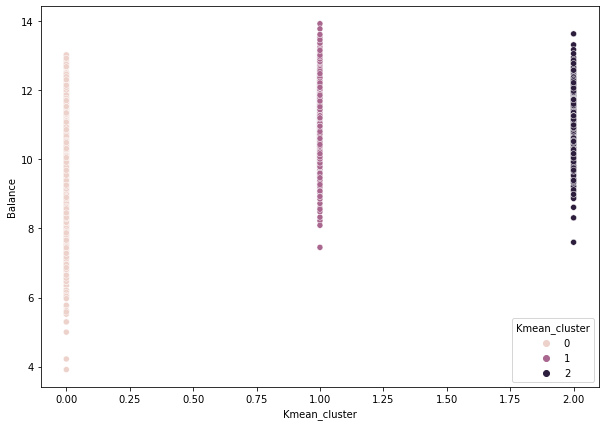

In [60]:
plt.figure(figsize=(10,7))
sns.scatterplot(airlines_cleaned1["Kmean_cluster"]  ,airlines_cleaned1["Balance"] , data=airlines_cleaned1 , hue  = airlines_cleaned1["Kmean_cluster"] )

In [61]:
airlines_cleaned1["Kmean_cluster"].value_counts()
# Data points in each clusters .

0    2183
1    1273
2     237
Name: Kmean_cluster, dtype: int64